In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/home/therochvoices/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [6]:
from keras.utils import np_utils
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


In [3]:
train = pd.read_csv('data/emnist-balanced-train.csv', header=None)
test  = pd.read_csv("data/emnist-balanced-test.csv", header=None)

In [4]:
train.sample()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
112398,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.sample()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
12599,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_y = train.iloc[:, 0]
train_x = train.iloc[:, 1:]
test_y = test.iloc[:, 0]
test_x = test.iloc[:, 1:]

In [8]:
someShit = train_x.iloc[[34]].values

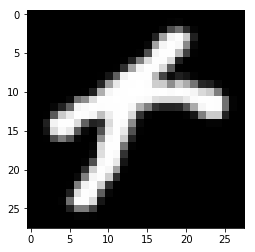

In [9]:
plt.imshow(someShit.reshape(28,28), cmap='gray')

In [12]:
'''def rotate(image):
    image = image.reshape([28, 28])
    image = np.fliplr(image)
    image = np.rot90(image)
    return image.reshape([28 * 28])
train_x = np.apply_along_axis(rotate, 1, train_x)/255
test_x =''' 

'def rotate(image):\n    image = image.reshape([28, 28])\n    image = np.fliplr(image)\n    image = np.rot90(image)\n    return image.reshape([28 * 28])\ntrain_x = np.apply_along_axis(rotate, 1, train_x)/255\ntest_x ='

In [13]:
num_classes = 47
train_y = np_utils.to_categorical(train_y, num_classes)

In [14]:
train_y.shape

(112800, 47)

In [15]:
train_x = train_x.astype('float32')
train_x = train_x/255

In [16]:
train_x.shape

(112800, 784)

In [17]:
inp = Input(shape=(784,))
h1 = Dense(1024, activation='relu')(inp)
d1 = Dropout(0.2)(h1)
h2 = Dense(1024, activation='relu')(d1)
d2 = Dropout(0.2)(h2)
out = Dense(num_classes, activation='softmax')(d2) 
model = Model(input=inp, output=out)

model.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
              optimizer='adam', # using the Adam optimiser
              metrics=['accuracy']) # reporting the accuracy
checkpointer = ModelCheckpoint('model-emnist-nn.h5', verbose=1, save_best_only=True)
earlystopper = EarlyStopping(patience=5, verbose=1)

/home/therochvoices/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  import sys


In [19]:
history=model.fit(train_x, train_y, # Train the model using the training set...
          batch_size=512, nb_epoch=50,
          verbose=1, validation_split=0.1,callbacks=[earlystopper,checkpointer]) # ...holding out 10% of the data for validation

/home/therochvoices/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 101520 samples, validate on 11280 samples
Epoch 1/50
101376/101520 [============================>.] - ETA: 0s - loss: 1.1076 - acc: 0.6796
Epoch 00001: val_loss improved from inf to 0.64510, saving model to model-emnist-nn.h5
101520/101520 [==============================] - 27s 265us/step - loss: 1.1070 - acc: 0.6797 - val_loss: 0.6451 - val_acc: 0.7913
Epoch 2/50
101376/101520 [============================>.] - ETA: 0s - loss: 0.6039 - acc: 0.8040
Epoch 00002: val_loss improved from 0.64510 to 0.52837, saving model to model-emnist-nn.h5
101520/101520 [==============================] - 31s 308us/step - loss: 0.6038 - acc: 0.8039 - val_loss: 0.5284 - val_acc: 0.8194
Epoch 3/50
101376/101520 [============================>.] - ETA: 0s - loss: 0.4941 - acc: 0.8343
Epoch 00003: val_loss improved from 0.52837 to 0.47087, saving model to model-emnist-nn.h5
101520/101520 [==============================] - 31s 307us/step - loss: 0.4941 - acc: 0.8343 - val_loss: 0.4709 - val_acc: 0.8358

In [21]:
test_y = np_utils.to_categorical(test_y, num_classes)

In [24]:
test_x = test_x.astype('float32')
test_x /= 255

In [25]:
model.evaluate(test_x, test_y, verbose=1)

18800/18800 [==============================] - 3s 138us/step


[0.4361521779729965, 0.8581382978723404]

In [37]:
fuck = test_x.iloc[3].values

In [43]:
shit = model.predict(fuck.reshape(1,784))

In [47]:
shit.argmax()

26

In [48]:
test_y[3]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [61]:
labels = pd.read_csv('data/emnist-balanced-train.csv', header=None)
labels = labels.iloc[:, 0].values

In [63]:
uniques, ids = np.unique(labels, return_inverse=True)

In [65]:
uniques

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46])

In [58]:
uniques[shit.argmax()]

26

In [59]:
uniques

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46])

In [60]:
labels

array([45, 36, 43, ..., 23, 31,  8])

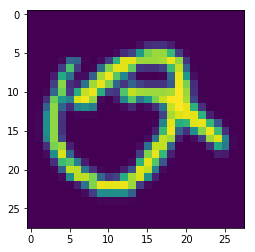

In [70]:
plt.imshow(fuck.reshape(28,28))